<a href="https://colab.research.google.com/github/bernatm/ABDataChallengeExtension/blob/main/ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import libraries#

In [ ]:
import pandas as pd
from collections import Counter
import seaborn as sns
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
from scipy.stats import shapiro

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import and visualize data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/TFG/Data AB/all_zone_data.csv")

#Datetime formatting

data['FECHA'] = pd.to_datetime(data['Unnamed: 0'])
data = data.drop(columns = ['Unnamed: 0'])
data = data.set_index('FECHA')

,CONSUM,Estimated,DAY,MONTH,YEAR,WEEKDAY_NUM,IS_WEEKEND
FECHA,,,,,,,
2019-01-06,150.444786,0.0,3.500000,1.000000,2019.0,3.5,0.333333
2019-01-13,146.927968,0.0,10.000000,1.000000,2019.0,3.0,0.285714
2019-01-20,143.461825,0.0,17.000000,1.000000,2019.0,3.0,0.285714
2019-01-27,138.013292,0.0,24.000000,1.000000,2019.0,3.0,0.285714
2019-02-03,145.200978,0.0,17.714286,1.428571,2019.0,3.0,0.285714


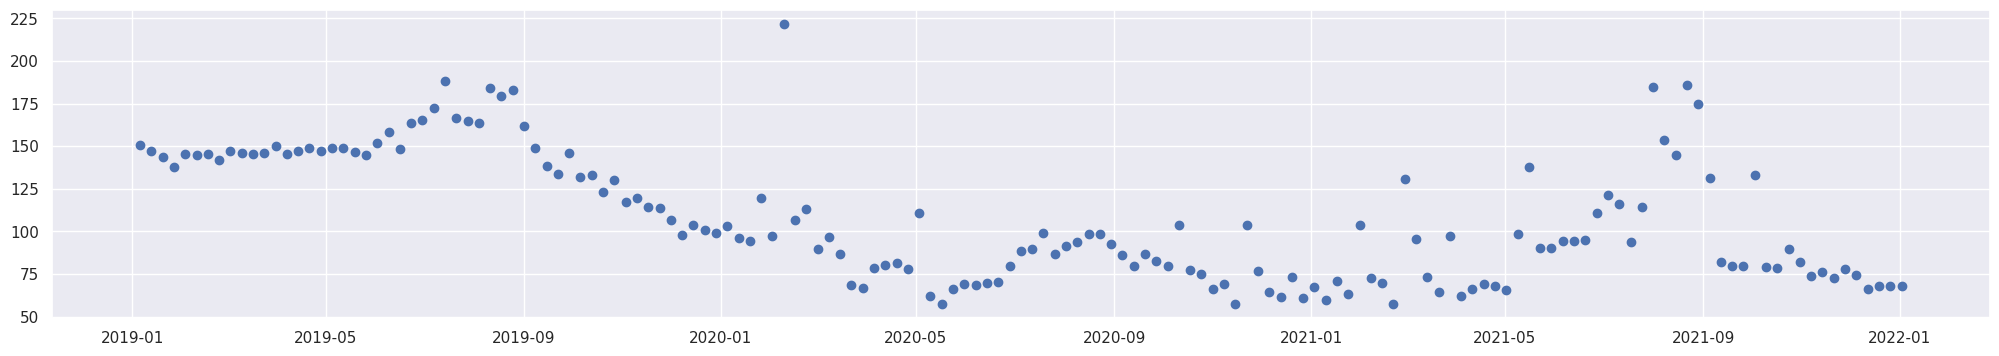

In [ ]:
zone = 'BARCELONA'
zone_data = data[data['ZONA']==zone]

zone_data = zone_data.drop(columns = ['ZONA'])

# Convert the WEEKDAY column to a numeric data type
zone_data['WEEKDAY_NUM'] = zone_data.index.weekday
sns.set(rc={'figure.figsize':(25, 4)})
zone_data = zone_data.resample('W').mean()
plt.plot(zone_data.index, zone_data['CONSUM'], 'o')
zone_data.head()

##Differencing

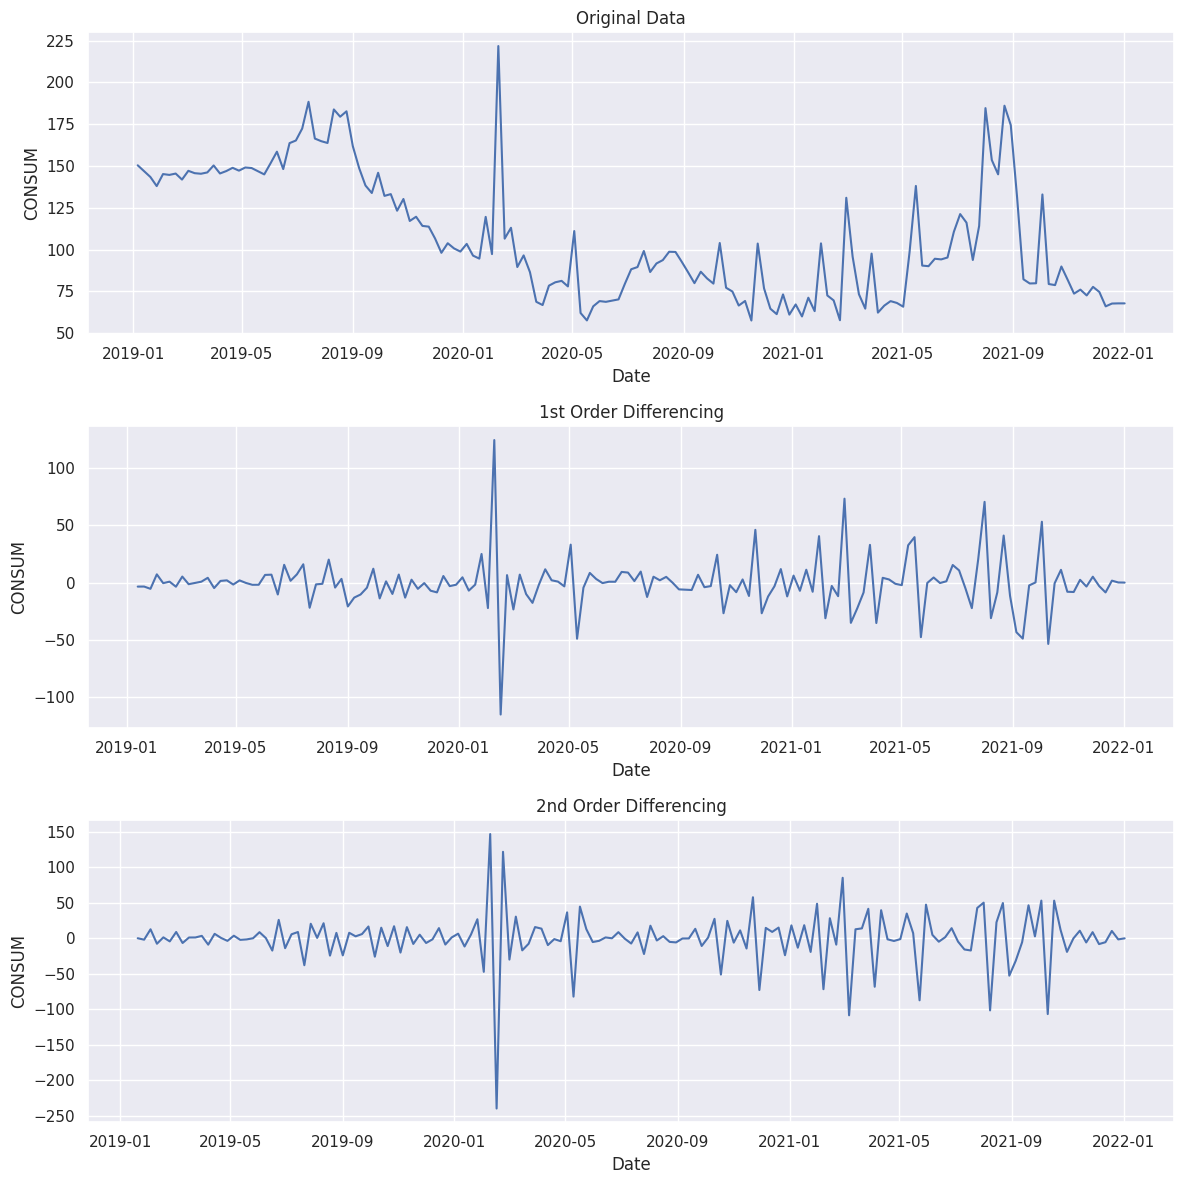

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Original Data
axes[0].plot(zone_data["CONSUM"])
axes[0].set_xlabel("Date")
axes[0].set_ylabel("CONSUM")
axes[0].set_title("Original Data")

# 1st Order Differencing
axes[1].plot(zone_data["CONSUM"].diff())
axes[1].set_xlabel("Date")
axes[1].set_ylabel("CONSUM")
axes[1].set_title("1st Order Differencing")

# 2nd Order Differencing
axes[2].plot(zone_data["CONSUM"].diff().diff().dropna())
axes[2].set_xlabel("Date")
axes[2].set_ylabel("CONSUM")
axes[2].set_title("2nd Order Differencing")

plt.tight_layout()
plt.show()


##ARIMA Model

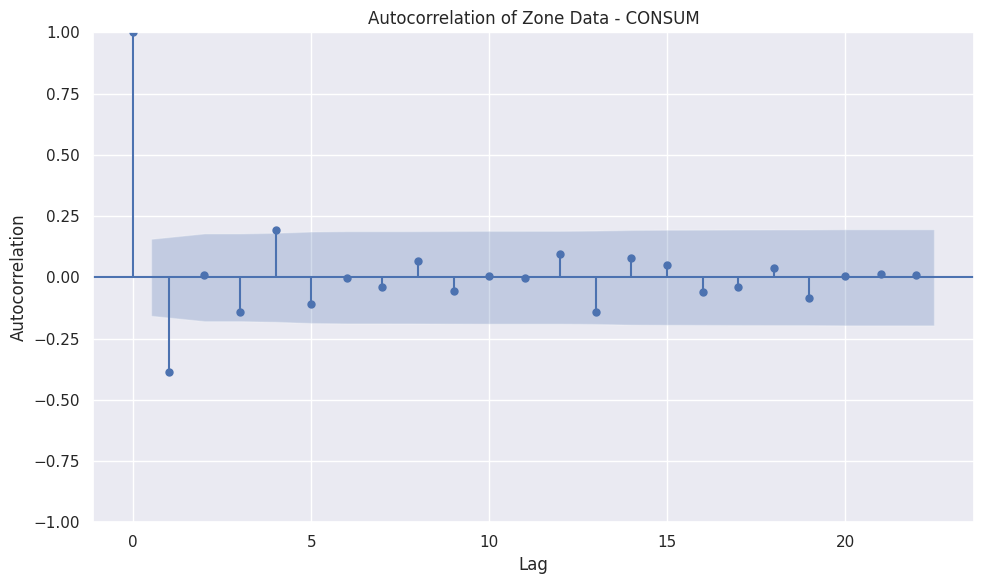

'\n###2nd differencing\nfig = plt.figure(figsize=(16, 6))\n\nax1 = plt.subplot(1, 2, 1)\nplot_acf(zone_data["CONSUM"].diff().diff().dropna(), ax=ax1)\nplt.xlabel("Lag")\nplt.ylabel("Autocorrelation")\nplt.title("Autocorrelation of Zone Data - CONSUM")\n\nax2 = plt.subplot(1, 2, 2)\nplt.plot(zone_data["CONSUM"].diff().diff().dropna())\nplt.xlabel("Date")\nplt.ylabel("CONSUM")\nplt.title("2nd order Differencing")\n\nplt.tight_layout()\n\nplt.show()\n'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
"""
fig = plt.figure(figsize=(16, 6))

ax1 = plt.subplot(1, 2, 1)
plot_acf(zone_data["CONSUM"], ax=ax1)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of Zone Data - CONSUM")

ax2 = plt.subplot(1, 2, 2)
plt.plot(zone_data["CONSUM"])
plt.xlabel("Date")
plt.ylabel("CONSUM")
plt.title("Consumption in Barcelona")
plt.tight_layout()

plt.show()
"""
###1st differencing
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

plot_acf(zone_data["CONSUM"].diff().dropna(), ax=ax)
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("Autocorrelation of Zone Data - CONSUM")

plt.tight_layout()
plt.show()

"""
###2nd differencing
fig = plt.figure(figsize=(16, 6))

ax1 = plt.subplot(1, 2, 1)
plot_acf(zone_data["CONSUM"].diff().diff().dropna(), ax=ax1)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of Zone Data - CONSUM")

ax2 = plt.subplot(1, 2, 2)
plt.plot(zone_data["CONSUM"].diff().diff().dropna())
plt.xlabel("Date")
plt.ylabel("CONSUM")
plt.title("2nd order Differencing")

plt.tight_layout()

plt.show()
"""

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(zone_data["CONSUM"].dropna())
print("p-value: ", result[1])
result = adfuller(zone_data["CONSUM"].diff().dropna())
print("p-value: ", result[1])

p-value:  0.37224033829143344
p-value:  8.019393676317377e-20


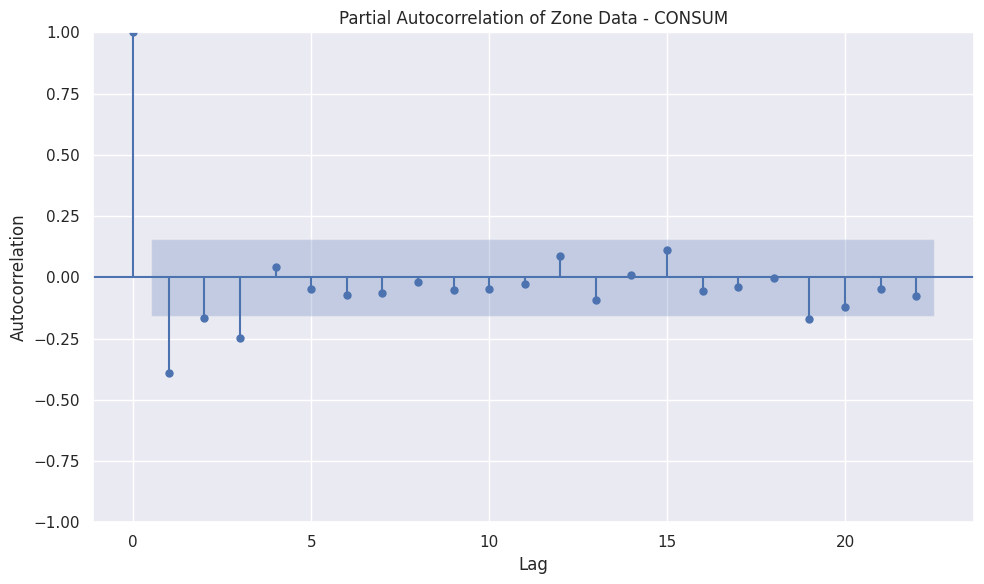

'\nax2 = plt.subplot(1, 2, 2)\nplt.plot(zone_data["CONSUM"].diff())\nplt.xlabel("Date")\nplt.ylabel("CONSUM")\nplt.title("1st Order Differencing")\n\nplt.tight_layout()\n\nplt.show()\n\n###2nd differencing\nfig = plt.figure(figsize=(16, 6))\n\nax1 = plt.subplot(1, 2, 1)\nplot_pacf(zone_data["CONSUM"].diff().diff().dropna(), ax=ax1)\nplt.xlabel("Lag")\nplt.ylabel("Partial Autocorrelation")\nplt.title("Partial Autocorrelation of Zone Data - CONSUM")\n\nax2 = plt.subplot(1, 2, 2)\nplt.plot(zone_data["CONSUM"].diff().diff().dropna())\nplt.xlabel("Date")\nplt.ylabel("CONSUM")\nplt.title("2nd order Differencing")\n\nplt.tight_layout()\n\nplt.show()\n'

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
###1st differencing

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

plot_pacf(zone_data["CONSUM"].diff().dropna(), ax=ax)
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("Partial Autocorrelation of Zone Data - CONSUM")

plt.tight_layout()
plt.show()

"""
ax2 = plt.subplot(1, 2, 2)
plt.plot(zone_data["CONSUM"].diff())
plt.xlabel("Date")
plt.ylabel("CONSUM")
plt.title("1st Order Differencing")

plt.tight_layout()

plt.show()

###2nd differencing
fig = plt.figure(figsize=(16, 6))

ax1 = plt.subplot(1, 2, 1)
plot_pacf(zone_data["CONSUM"].diff().diff().dropna(), ax=ax1)
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation of Zone Data - CONSUM")

ax2 = plt.subplot(1, 2, 2)
plt.plot(zone_data["CONSUM"].diff().diff().dropna())
plt.xlabel("Date")
plt.ylabel("CONSUM")
plt.title("2nd order Differencing")

plt.tight_layout()

plt.show()
"""

In [ ]:
zone_data

,CONSUM,Estimated,DAY,MONTH,YEAR,WEEKDAY_NUM,IS_WEEKEND
FECHA,,,,,,,
2019-01-06,150.444786,0.000000,3.500000,1.000000,2019.000000,3.5,0.333333
2019-01-13,146.927968,0.000000,10.000000,1.000000,2019.000000,3.0,0.285714
2019-01-20,143.461825,0.000000,17.000000,1.000000,2019.000000,3.0,0.285714
2019-01-27,138.013292,0.000000,24.000000,1.000000,2019.000000,3.0,0.285714
2019-02-03,145.200978,0.000000,17.714286,1.428571,2019.000000,3.0,0.285714
...,...,...,...,...,...,...,...
2021-12-05,74.674094,0.000000,10.571429,11.714286,2021.000000,3.0,0.285714
2021-12-12,66.069546,0.142857,9.000000,12.000000,2021.000000,3.0,0.285714
2021-12-19,67.753210,0.714286,16.000000,12.000000,2021.000000,3.0,0.285714


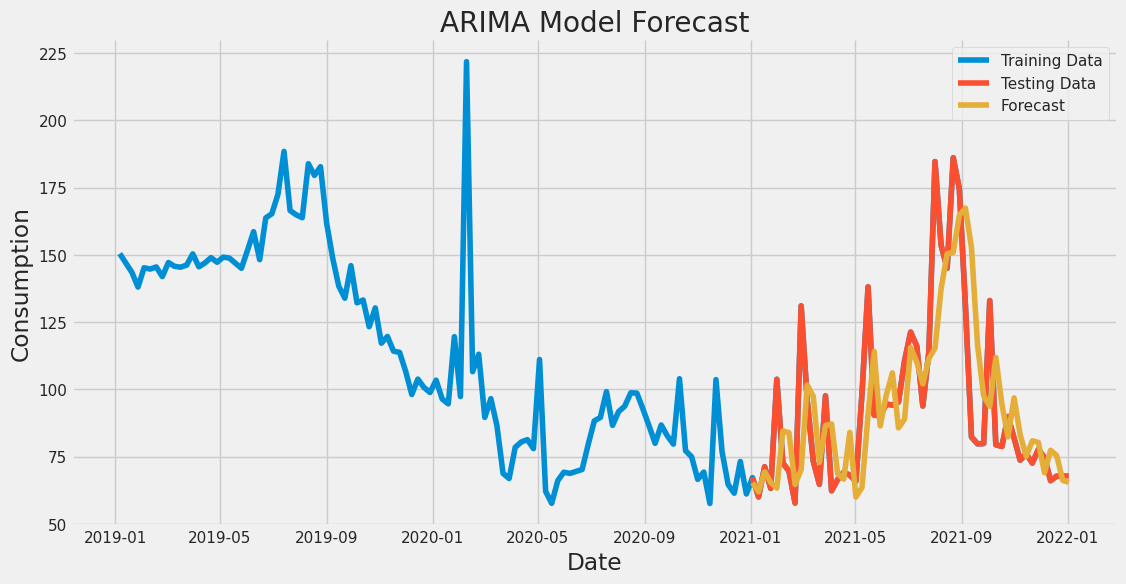

2021-01-03     65.301167
2021-01-10     61.937534
2021-01-17     69.429187
2021-01-24     65.383091
2021-01-31     63.329182
2021-02-07     84.575845
2021-02-14     83.908056
2021-02-21     64.649419
2021-02-28     70.152363
2021-03-07    101.627360
2021-03-14     97.355035
2021-03-21     72.903620
2021-03-28     86.563529
2021-04-04     87.168116
2021-04-11     68.733331
2021-04-18     66.632067
2021-04-25     84.033268
2021-05-02     59.965176
2021-05-09     63.569927
2021-05-16     90.624191
2021-05-23    114.124155
2021-05-30     86.423714
2021-06-06     97.984192
2021-06-13    106.113415
2021-06-20     85.699089
2021-06-27     88.923299
2021-07-04    115.568799
2021-07-11    110.171205
2021-07-18    102.022343
2021-07-25    111.465750
2021-08-01    115.295903
2021-08-08    137.302613
2021-08-15    150.464177
2021-08-22    150.930233
2021-08-29    164.682001
2021-09-05    167.357967
2021-09-12    152.618817
2021-09-19    116.424771
2021-09-26     97.623084
2021-10-03     93.729319


In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets
train_data = zone_data['2019':'2021']
test_data = zone_data['2021-01-03':'2022-01-02']

# Define the ARIMA model parameters
p = 3  # AR order
d = 1 # differencing order
q = 4  # MA order

# Fit the ARIMA model to the training data
model = ARIMA(train_data['CONSUM'], order=(p, d, q))
results = model.fit()

# Generate predictions for the test data
start_date = pd.to_datetime('2021-01-03')
end_date = pd.to_datetime('2022-01-02')
forecast = results.predict(start=start_date, end=end_date)

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['CONSUM'], label='Training Data')
plt.plot(test_data.index, test_data['CONSUM'], label='Testing Data')
plt.plot(forecast.index, forecast.values, label='Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.show()

print(forecast)



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr

# Calculate evaluation metrics
mape = np.mean(np.abs((test_data['CONSUM'] - forecast) / test_data['CONSUM'])) * 100
me = np.mean(test_data['CONSUM'] - forecast)
mae = mean_absolute_error(test_data['CONSUM'], forecast)
mpe = np.mean((test_data['CONSUM'] - forecast) / test_data['CONSUM']) * 100
rmse = np.sqrt(mean_squared_error(test_data['CONSUM'], forecast))
acf1 = results.resid.autocorr(lag=1)
corr, _ = pearsonr(test_data['CONSUM'], forecast)
minmax = np.min(np.abs(test_data['CONSUM'] - forecast))

# Create a table of evaluation metrics
metrics_table = pd.DataFrame({
    'Metric': ['MAPE', 'ME', 'MAE', 'MPE', 'RMSE', 'ACF1', 'Corr', 'Min-Max Error'],
    'Value': [mape, me, mae, mpe, rmse, acf1, corr, minmax]
})

# Print the table
print("Evaluation Metrics:")
metrics_table

Evaluation Metrics:


,Metric,Value
0,MAPE,16.998488
1,ME,0.190748
2,MAE,16.577284
3,MPE,-3.564361
4,RMSE,23.886992
5,ACF1,0.012086
6,Corr,0.684957
7,Min-Max Error,0.939256


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


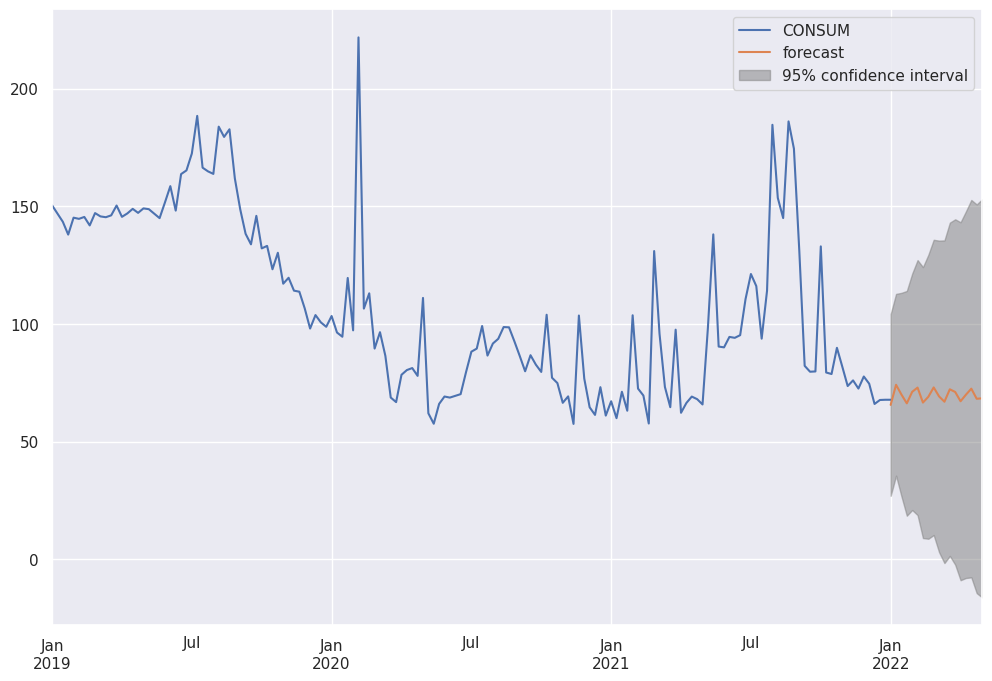

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

dta = zone_data[['CONSUM']]
dta.index = pd.date_range(start='2019-01-06', end='2022-01-02', freq='W')
res = ARIMA(dta, order=(3,1,4)).fit()

fig, ax = plt.subplots(figsize=(12,8))
ax = dta.loc['2019':].plot(ax=ax)
plot_predict(res, '2022', '2022-05-01', ax=ax)


plt.show()


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.7 MB/s eta 0:00:00


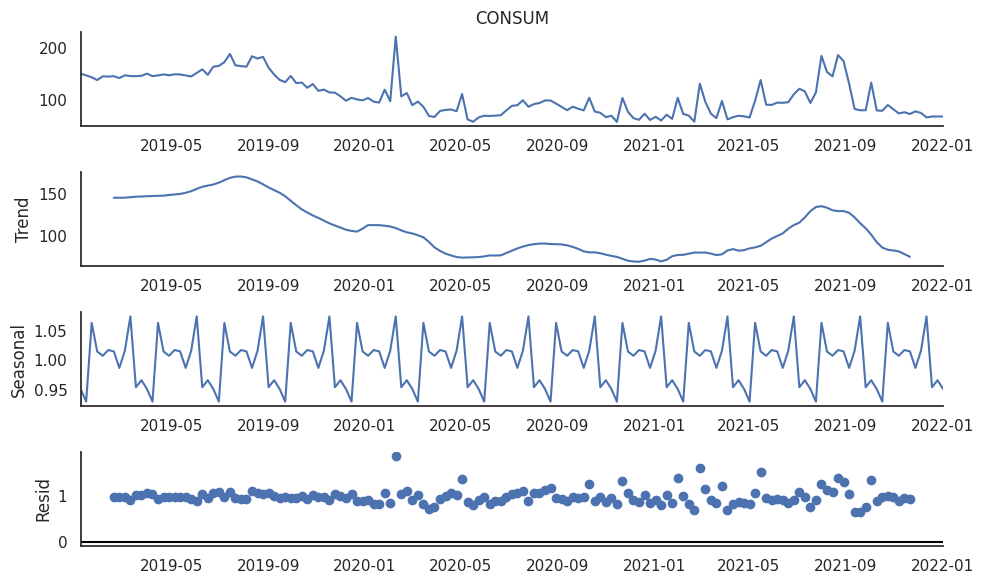

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

plt.rcParams["figure.figsize"] = (10,6)
result = seasonal_decompose(zone_data['CONSUM'], model='multiplicative', period = 12)
result.plot()
plt.show()

In [ ]:
# split into train and test
pred_periods = 50
split_number = zone_data['CONSUM'].count() - pred_periods # corresponds to a year
df_train = pd.DataFrame(zone_data['CONSUM'][:split_number]).rename(columns={'CONSUM':'y_train'})
df_test = pd.DataFrame(zone_data['CONSUM'][split_number:]).rename(columns={'CONSUM':'y_test'})

# auto_arima
model_fit = pm.auto_arima(df_train, test='adf',
                         max_p=3, max_d=3, max_q=3,
                         seasonal=False,
                         max_P=3, max_D=2, max_Q=3,
                         trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

# summarize the model characteristics
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=943.505, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=910.257, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=909.554, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=941.648, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=910.284, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=910.926, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=910.585, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=908.743, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=909.116, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=909.888, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=908.759, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=909.572, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.351 seconds
                               SARIMAX 

<Axes: title={'center': 'Consumption in Barcelona'}, xlabel='FECHA'>

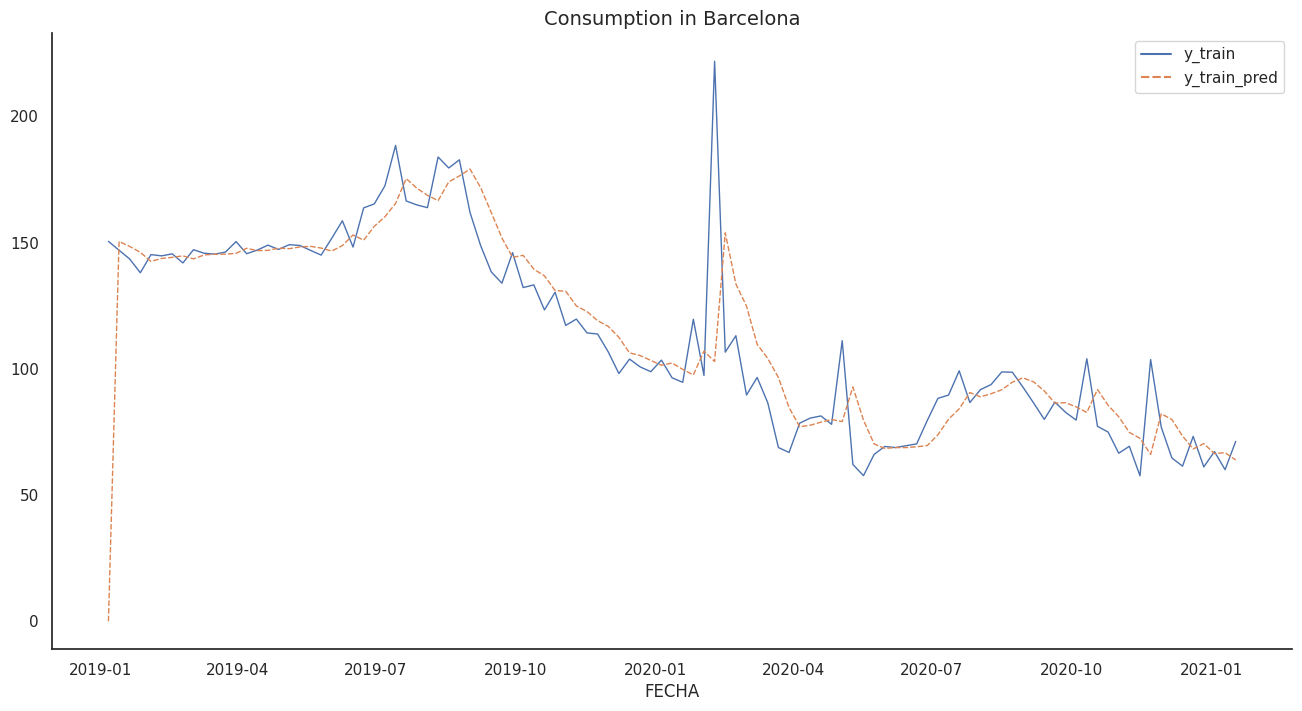

In [ ]:
pred = model_fit.predict_in_sample(dynamic=False) # works only with auto-arima
df_train['y_train_pred'] = pred

# Calculate the percentage difference
df_train['diff_percent'] = abs((df_train['y_train'] - pred) / df_train['y_train'])* 100

# Print the predicted time-series
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Consumption in Barcelona", fontsize=14)
sns.lineplot(data=df_train[['y_train', 'y_train_pred']], linewidth=1.0)


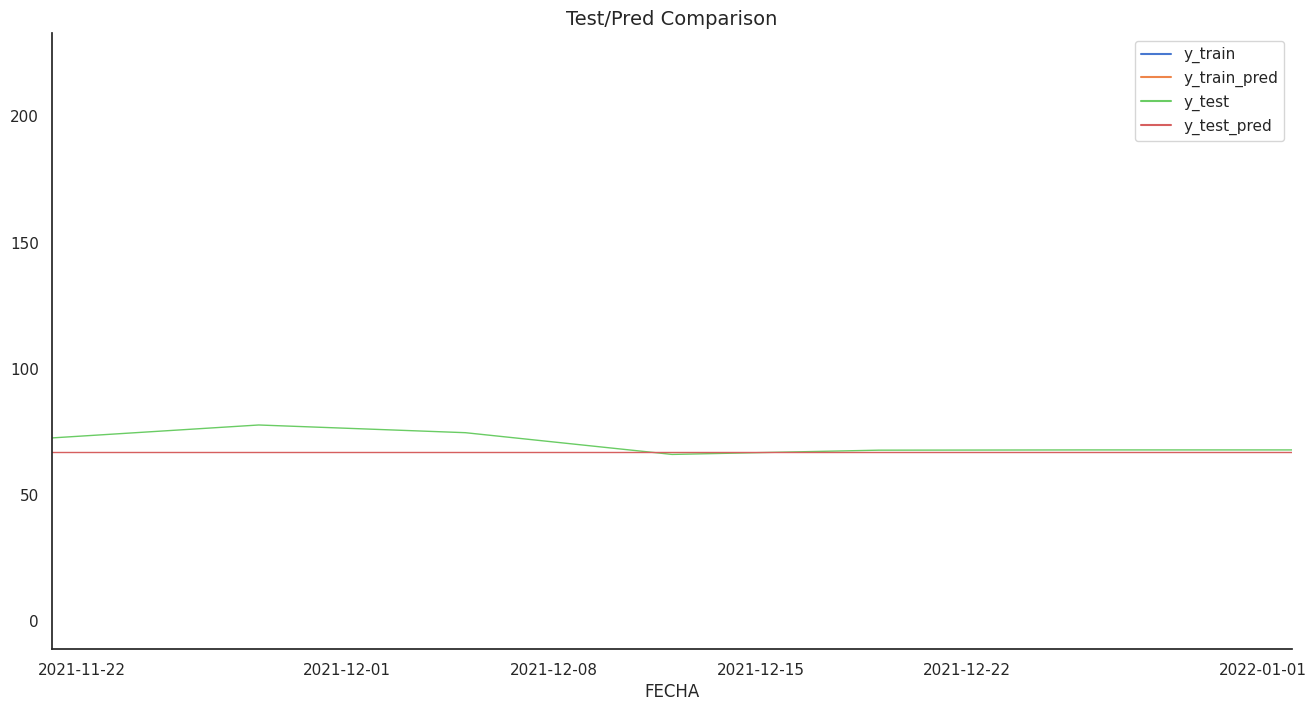

In [ ]:
# Generate prediction for n periods,
# Predictions start from the last date of the training data
test_pred = model_fit.predict(n_periods=pred_periods, dynamic=False)
df_test['y_test_pred'] = test_pred
df_union = pd.concat([df_train, df_test])
df_union.rename(columns={'CONSUM':'y_test'}, inplace=True)

# Print the predicted time-series
fig, ax = plt.subplots(figsize=(16, 8))
plt.title("Test/Pred Comparison", fontsize=14)
sns.despine();
sns.lineplot(data=df_union[['y_train', 'y_train_pred', 'y_test', 'y_test_pred']], linewidth=1.0, dashes=False, palette='muted')
ax.set_xlim([df_union.index[150],df_union.index.max()])
plt.legend()
plt.show()

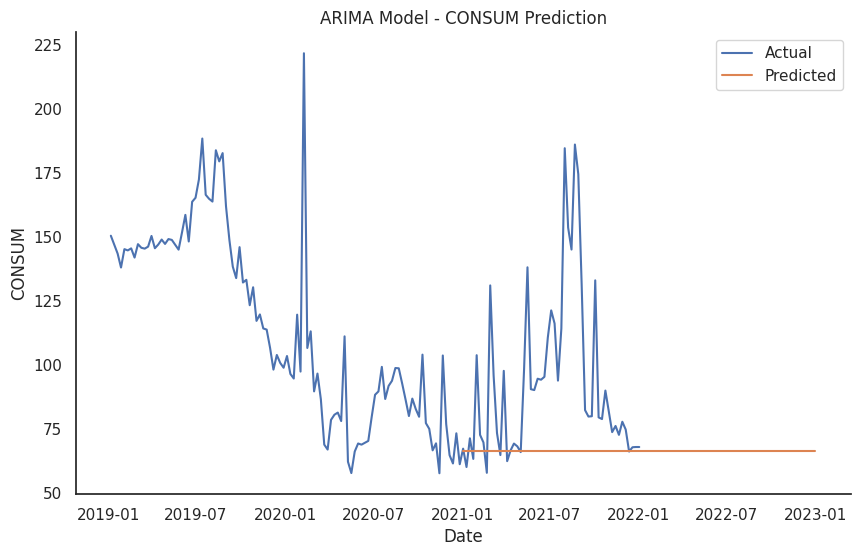

In [ ]:
# Step 4: Split the dataset into training and testing sets
consum_series = zone_data['CONSUM']
train_data = consum_series['2019-01-01':'2021-01-01']

# Step 5: Train the ARIMA model
model = ARIMA(train_data, order=(0, 1, 1))
model_fit = model.fit()

# Step 6: Make predictions for the year 2023
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2022-12-31')
forecast = model_fit.predict(start=start_date, end=end_date)

# Step 7: Visualize the predictions
plt.plot(consum_series, label='Actual')
plt.plot(forecast, label='Predicted')
plt.xlabel('Date')
plt.ylabel('CONSUM')
plt.title('ARIMA Model - CONSUM Prediction')
plt.legend()
plt.show()

##ARIMA Model Approach II


In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(zone_data["CONSUM"],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1920.9155183861076
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1651.162167407168
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1456.1690031901626
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1326.016518007672
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1452.8511380247394
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1416.3810043304557
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1334.5453345223405
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1327.0759340117684
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1756.3222942912748
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1537.8426057682673
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1404.2371904419556
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1272.420860318537
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1409.2315238412953
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1360.858668470824
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1293.6572569826578
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1275.6449499956304
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1411.3650588478827
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1314.1480629063

## SARIMA Model

In [ ]:
mod = sm.tsa.statespace.SARIMAX(zone_data["CONSUM"],
                                order=(0, 1, 4),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)

results = mod.fit()

In [ ]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

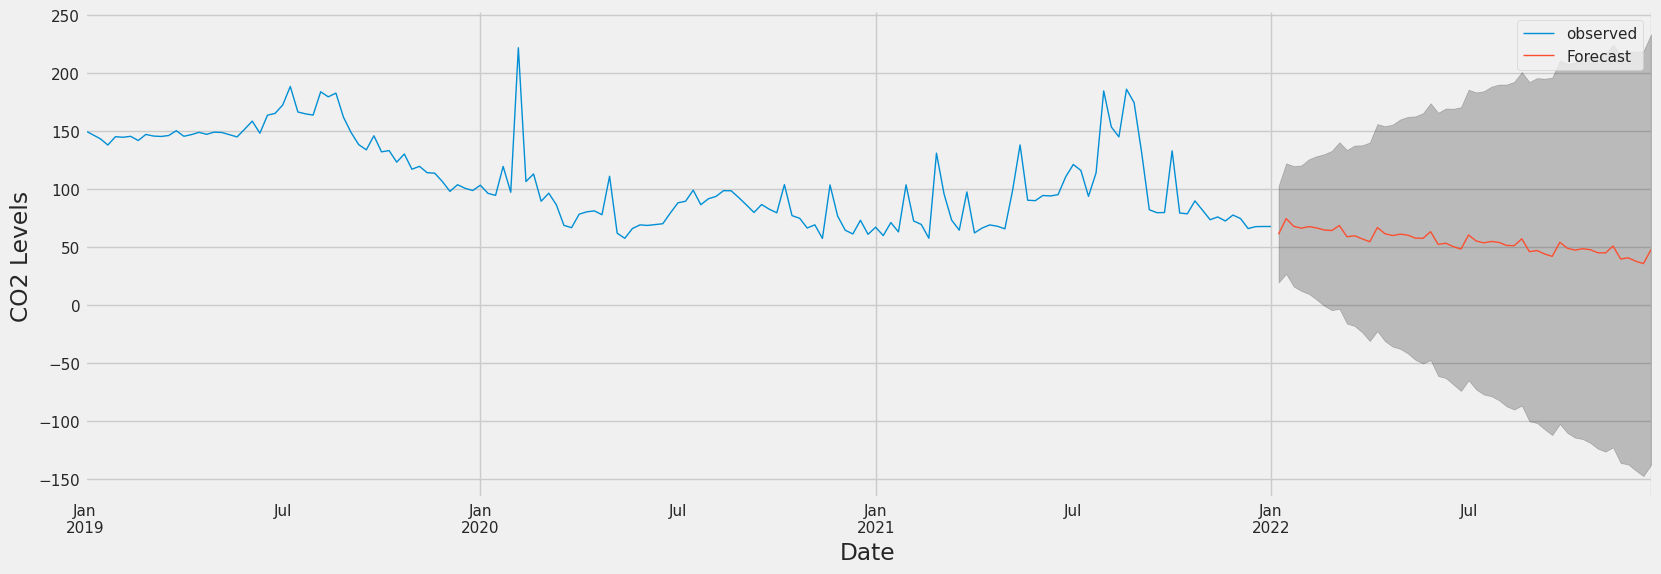

In [ ]:
ax = zone_data["CONSUM"].plot(label='observed', figsize=(18, 6), linewidth=1)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', linewidth=1)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()